<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-1/blob/main/FaceRecognitionBueno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition

En este notebook se verá la técnica utilizada para extraer de una imagen la/las caras que aparecen en ella, realizar pruebas para comprobar si es capaz de comprobar que si una persona aparece en otra imagen, y por último, almacenar los embeddings de las imagenes en un ".csv" para un posterior procesado. Es necesario resaltar que calcular los embeddings de 21000 imágenes es una tarea costosa que, además de que el modelo tardaría un tiempo excesivamente grande en calcular dichos embeddings, el tiempo de búsqueda aumentaría considerablemente. Por ello hemos procesado 2000 imágenes para ajustarse a un tiempo de calculo y búsqueda aceptable.

Para ello es necesario descargar los dataset en los cuales se encuentran las imágenes.

## Descarga del dataset

En primer lugar descargamos el dataset en el cual se encuentran todas las imágenes del modelo, en total son unas 21000, por lo que la descarga puede tardar unos minutos.

In [1]:
!wget https://www.dropbox.com/s/chfwr4x475y3p1v/noticiasFotos.zip?dl=0 -O 2.zip
!unzip 2.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: 2/467124.jpg            
  inflating: 2/467130.jpg            
  inflating: 2/467131.jpg            
  inflating: 2/467132.jpg            
  inflating: 2/467135.jpg            
  inflating: 2/467136.jpg            
  inflating: 2/467138.jpg            
  inflating: 2/467139.jpg            
  inflating: 2/467140.jpg            
  inflating: 2/46715.jpg             
  inflating: 2/467156.jpg            
  inflating: 2/46716.jpg             
  inflating: 2/467161.jpg            
  inflating: 2/467163.jpg            
  inflating: 2/467164.jpg            
  inflating: 2/467169.jpg            
  inflating: 2/46717.jpg             
  inflating: 2/467170.jpg            
  inflating: 2/467173.jpg            
  inflating: 2/453565.jpg            
  inflating: 2/453569.jpg            
  inflating: 2/45357.jpg             
  inflating: 2/453572.jpg            
  inflating: 2/453576.jpg            
  inflating: 2/453577.jpg  

Posteriormente, descargamos la imagen de prueba la cual, más adelante, la usaremos como prueba para saber que el modelo detecta correctamente la cara que se le proporciona y es capaz de detectarla en las imágenes de prueba.

In [2]:
!wget https://www.dropbox.com/s/2t7n2q8b8gidjsh/foto.zip?dl=0 -O foto.zip
!unzip foto.zip

--2021-05-25 10:35:26--  https://www.dropbox.com/s/2t7n2q8b8gidjsh/foto.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2t7n2q8b8gidjsh/foto.zip [following]
--2021-05-25 10:35:26--  https://www.dropbox.com/s/raw/2t7n2q8b8gidjsh/foto.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc414b9d31e166b225a73f4d508a.dl.dropboxusercontent.com/cd/0/inline/BPLvjpx8pMaaNi2VJfZN0ZEHIHSOWq7Xxud4OFZ2-mzMHGnegQHdZtfPa2bOHG-IqhlOFbpjTl3D6Rvia67JFYrpe6fbI_w5KUmv7yDchhM-etSd7zzl45RFY_wOP5Ow1zeQUTu2-TNLCPTCK-nvypqu/file# [following]
--2021-05-25 10:35:27--  https://uc414b9d31e166b225a73f4d508a.dl.dropboxusercontent.com/cd/0/inline/BPLvjpx8pMaaNi2VJfZN0ZEHIHSOWq7Xxud4OFZ2-mzMHGnegQHdZtfPa2bOHG-IqhlOFbpjTl3D6Rvia67JFYrpe6fbI_

Descargamos unas 50 imágenes las cuales usaremos como prueba de forma complementaria a la imagen descargada anteriormente.

In [3]:
!wget https://www.dropbox.com/s/hljg44uz78f6nah/resultado.zip?dl=0 -O resultados.zip
!unzip resultados.zip

--2021-05-25 10:35:28--  https://www.dropbox.com/s/hljg44uz78f6nah/resultado.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hljg44uz78f6nah/resultado.zip [following]
--2021-05-25 10:35:28--  https://www.dropbox.com/s/raw/hljg44uz78f6nah/resultado.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc776cf94967653b28b1e36eb64d.dl.dropboxusercontent.com/cd/0/inline/BPKvFlcI0Qm2iZ91u_xdJ_tD7y3-4k1s8wxMMp4u8riWHXD4ltZZ8N7f4iu6l4ekdHvNBAJV35IK6y-DXEVS95SZWUhu3qOLD-aaAUUtE19pajR1ogMStZ6TY-JO7Koi6ioF47AD9x0JAnXn-poc_uhm/file# [following]
--2021-05-25 10:35:28--  https://uc776cf94967653b28b1e36eb64d.dl.dropboxusercontent.com/cd/0/inline/BPKvFlcI0Qm2iZ91u_xdJ_tD7y3-4k1s8wxMMp4u8riWHXD4ltZZ8N7f4iu6l4ekdHvNBAJV35IK6y-

## Modelo de reconocimiento facial

### Construcción del modelo
Se descargan las librerías necesarias para la construcción del modelo.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

En este caso usaremos una Red Convolucional especializada en la detección de objetos, y en este caso, ha sido entrenada específicamente para la detección de rostros.

Este modelo pre-entrenado ("*mobilenet_graph.pb*") está almacenado en un formato de grafo de TensorFlow y para realizar la lectura usaremos las funciones "*io.gfile*" y "*import_graph_def*".

In [2]:
!wget https://www.dropbox.com/s/uji1ufb009ic3m0/mobilenet_graph.pb?dl=0 -O mobilenet_graph.pb
# Leer mobilenet_graph.pb
with tf.io.gfile.GFile('mobilenet_graph.pb','rb') as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Graph().as_default() as mobilenet:
    tf.import_graph_def(graph_def,name='')

--2021-05-25 10:43:11--  https://www.dropbox.com/s/uji1ufb009ic3m0/mobilenet_graph.pb?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uji1ufb009ic3m0/mobilenet_graph.pb [following]
--2021-05-25 10:43:11--  https://www.dropbox.com/s/raw/uji1ufb009ic3m0/mobilenet_graph.pb
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc528e662c4d9715a3f373c42df5.dl.dropboxusercontent.com/cd/0/inline/BPLLi43SCJOfkmeAxBoK0N6GF4wP9O7mN75OVdfNCRBrKbcBZxyYQy3uz6ZNaM1iZM-AbuomWB9bEF6bxvfiKJHexMm3sraJQHvh-QAs_e4UTRVtNiUiLvRDG-x8Cifk8S6L_i9Axuyft8EBRyA6BbBo/file# [following]
--2021-05-25 10:43:12--  https://uc528e662c4d9715a3f373c42df5.dl.dropboxusercontent.com/cd/0/inline/BPLLi43SCJOfkmeAxBoK0N6GF4wP9O7mN75OVdfNCRBrKbcBZxyYQy3uz6ZNaM1i

Defino un método el cual permitirá realizar lecturas a las imágenes las cuales elijamos y para ello usamos la librería *OpenCV*.

In [4]:
# Cargar imagen
def load_image(DIR, NAME):
    return cv2.cvtColor(cv2.imread(f'{DIR}/{name}'), cv2.COLOR_BGR2RGB)

Para la realizar la función capaz de detectar caras es necesario introducir como entradas la imagen original, y el umbral. Este umbral es el encarga de decidir cuales de las regiones de interés son realmente caras y cuales no, y para esto se realiza gracias a que cada región tiene un puntaje de entre 0 (significando que no hay probabilidad de que sea una cara) y 1 (total certeza que la región contiene una cara). Para este modelo, indicaré un umbral de 0.7, lo cual quiere decir que me gustaría que me cogiese las regiones que tuvieran una probabilidad igual o mayor a un 70% de que contuviese una cara.

In [5]:
def detect_faces(image, score_threshold=0.7):
    global boxes, scores
    (imh, imw) = image.shape[:-1]
    img = np.expand_dims(image,axis=0)
    
    # Inicializar mobilenet
    sess = tf.compat.v1.Session(graph=mobilenet)
    image_tensor = mobilenet.get_tensor_by_name('image_tensor:0')
    boxes = mobilenet.get_tensor_by_name('detection_boxes:0')
    scores = mobilenet.get_tensor_by_name('detection_scores:0')
    
    # Predicción (detección)
    (boxes, scores) = sess.run([boxes, scores], feed_dict={image_tensor:img})
    
    # Reajustar tamaños boxes, scores
    boxes = np.squeeze(boxes,axis=0)
    scores = np.squeeze(scores,axis=0)
    
    # Depurar bounding boxes
    idx = np.where(scores>=score_threshold)[0]
    
    # Crear bounding boxes
    bboxes = []
    for index in idx:
        ymin, xmin, ymax, xmax = boxes[index,:]
        (left, right, top, bottom) = (xmin*imw, xmax*imw, ymin*imh, ymax*imh)
        left, right, top, bottom = int(left), int(right), int(top), int(bottom)
        bboxes.append([left,right,top,bottom])
        
    return bboxes

En este caso definimos una función que nos permita dibujar sobre la imagen el resultado de la detección de las caras.

In [6]:
# Dibujar bounding boxes
def draw_box(image,box,color,line_width=6):
    if box==[]:
        return image
    else:
        cv2.rectangle(image,(box[0],box[2]),(box[1],box[3]),color,line_width)
    return image

### Prueba detección de caras

Para esta primera prueba vamos a elegir una imagen aleatoria para comprobar que el modelo es capaz de detectar caras en una imagen usando los métodos definidos anteriormente.



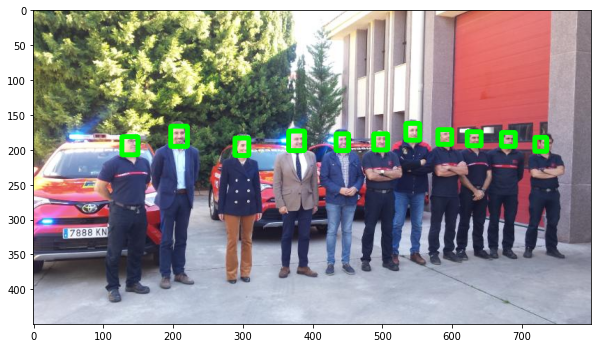

In [7]:
name = '777.jpg'
image = load_image('2',name)
bboxes = detect_faces(image)
for box in bboxes:
    detected_faces = draw_box(image,box,(0,255,0))
fig = plt.figure(figsize=(10,10))
plt.imshow(detected_faces)

Como se puede ver, el modelo es capaz de detectar las caras de la imagen a la perfección .

### Calculo de embeddings

Como veremos más adelante, para ser capaces de comparar los rostros de dos imágenes es necesario calcular el embedding de cada uno. Sin embargo, primero debemos definir una función la cual extrae la porción de la imagen que contiene el rostro (detectada por el método "*detect_faces*") y luego redimensionarla a una imagen de 160x160 para satisfacer los requerimientos de FaceNet (el cual trataremos a continuación).

In [8]:
# Extraer rostros
def extract_faces(image,bboxes,new_size=(160,160)):
    cropped_faces = []
    for box in bboxes:
        left, right, top, bottom = box
        face = image[top:bottom,left:right]
        cropped_faces.append(cv2.resize(face,dsize=new_size))
    return cropped_faces

Lo pruebo.

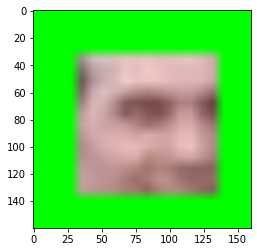

In [9]:
faces = extract_faces(image,bboxes)
plt.imshow(faces[1])

In [10]:
# FaceNet
#!wget https://www.dropbox.com/s/z0o1of3580smtwr/facenet_keras.h5?dl=0 -O facenet_keras.h5


--2021-05-25 10:43:20--  https://www.dropbox.com/s/z0o1of3580smtwr/facenet_keras.h5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/z0o1of3580smtwr/facenet_keras.h5 [following]
--2021-05-25 10:43:20--  https://www.dropbox.com/s/raw/z0o1of3580smtwr/facenet_keras.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc039dc20963f28a394c4970be62.dl.dropboxusercontent.com/cd/0/inline/BPJ2-I1vAyZREofw2yYyo4YIrGJhOWydlg1VADSr3Z6qddm8BKApp4AMsfYJop_r-9BK7g-gr8sNJlSH259LZnagUwqlx-KxXrCwIImOM6ztqwfgtWdIZ0x8u4sYAMGViBpqqIcYjiWSkHPR9TQhweUt/file# [following]
--2021-05-25 10:43:21--  https://uc039dc20963f28a394c4970be62.dl.dropboxusercontent.com/cd/0/inline/BPJ2-I1vAyZREofw2yYyo4YIrGJhOWydlg1VADSr3Z6qddm8BKApp4AMsfYJop_r-9BK7g

Instalo el modelo preentrenado usando "*load_model*" y verificamos que el tamaño de entrada de una imagen es 160x160, mientras que en la salida se genera un embedding correspondiente a un vector de 128 elementos.

In [11]:
facenet = load_model('facenet_keras.h5')

print(facenet.input_shape)
print(facenet.output_shape)

(None, 160, 160, 3)
(None, 128)


Ahora, defino una función la cual tomará como entradas el modelo FaceNet definido anteriormente y la región de la cara en tamaño 160x160. Sacará por pantalla el embedding correspondiente. 

In [12]:
def compute_embedding(model,face):
    face = face.astype('float32')
    
    mean, std = face.mean(), face.std()
    face = (face-mean) / std
    
    face = np.expand_dims(face,axis=0)
    
    embedding = model.predict(face)
    return embedding

### Prueba embedding

En este caso, aprovecho la regíon calculada en la anterior prueba para comprobar que calcula el embedding correctamente.

In [13]:
embedding = compute_embedding(facenet,faces[0])
print(embedding)

[[-5.82372397e-02 -1.19764650e+00  1.25598598e+00 -5.26613474e-01
  -2.20166877e-01 -4.10662293e-01  3.52265358e-01  7.58139670e-01
   6.79723680e-01 -1.51852942e+00  2.33485401e-01  5.75546399e-02
   2.27518725e+00  4.38606888e-01 -4.65668172e-01 -6.04925692e-01
  -1.79854065e-01  6.77343756e-02 -1.02674067e-01  5.66819385e-02
  -9.03087854e-01  8.01740229e-01 -1.69507921e+00  1.16099544e-01
   1.23362988e-04 -6.29971981e-01  3.65884215e-01  3.00556898e-01
  -8.46702039e-01  4.81535763e-01 -5.05037308e-01  6.28055215e-01
  -2.41420820e-01 -4.40055996e-01 -7.46894717e-01  1.33819151e+00
  -1.50287914e+00  3.95420462e-01 -1.06005001e+00  2.66634727e+00
   1.33339214e+00  2.90618181e-01  1.31665838e+00  4.82087731e-01
  -1.54306814e-01 -8.65636528e-01  7.94199705e-01 -1.83452591e-01
  -1.24660999e-01  3.11628371e-01 -1.84269547e+00  7.37762630e-01
  -1.73322409e-01 -1.45624250e-01 -7.57472217e-01  1.71476707e-01
  -9.73614037e-01 -7.92011201e-01  6.39629424e-01  8.22042048e-01
   9.11526

Se puede ver que lo realiza correctamente, por lo que ahora voy a probarlo con una foto la cual he descargado al principio del notebook para poder probarla más adelante de forma más completa y realista.

In [14]:
# Embeddings referencia
known_embeddings = []

print('Procesando rostros conocidos...')
for name in os.listdir('foto'):
    if name.endswith('.jpg'):
        print(f'   {name}')
        image = load_image('foto',name)
        bboxes = detect_faces(image)
        face = extract_faces(image,bboxes)
        known_embeddings.append(compute_embedding(facenet,face[0]))        
        
        
        

Procesando rostros conocidos...
   conchaAndreu.jpg


Muestro el embedding.

In [15]:
print(known_embeddings)

[array([[ 0.16271336,  0.48621234,  1.8757731 , -0.82379377,  0.659409  ,
        -0.3629449 ,  0.3353371 ,  0.7777404 , -0.4512933 , -0.5489634 ,
        -0.06453053,  0.08706602,  1.7031115 ,  0.90234876,  0.16001579,
        -1.42877   , -0.16216575, -0.4813187 ,  0.78640085, -0.20852222,
        -0.90521514, -0.08942136, -0.47549373,  0.58584064, -0.5964188 ,
         0.20514843, -0.8513645 ,  1.3090646 ,  0.48061854, -0.04805924,
        -0.77661514, -0.5880879 ,  0.75972867, -0.74531645,  0.01866479,
         0.5536687 , -0.24610865,  0.09339382, -0.96917325,  1.5265123 ,
         1.5485704 ,  1.0119594 ,  0.30268386,  0.30181885, -2.2646067 ,
         0.1828328 , -0.9950299 , -0.07626594,  0.24588476, -0.50420296,
         1.9102696 ,  2.288811  ,  0.39532748, -2.9916031 ,  0.1126762 ,
         1.0626613 ,  0.31108928,  0.39675045,  0.11094742, -0.6404619 ,
         0.9621411 , -1.744543  ,  0.75485003,  1.3502487 , -1.2542278 ,
        -0.41722983, -0.0903879 , -0.19936413,  2.

## Prueba con foto real

A continuación, voy a comparar la foto procesada anterior (la cual está en el directorio 'foto') y la voy a comparar a un conjunto de imágenes de prueba descargadas al principio del notebook (se encuentran el el directorio 'resultado') las cuales no son más que unas 50 imágenes sacadas del conjunto completo inicial.

Esto lo realizamos para poder probar la precisión que posee el modelo, y en caso de fallo o poca precisión ajustar los parámetros de una forma más sencilla sin tener que ejecutar la prueba frente al modelo completo.

Para ello defino la función que compara los embeddings de dos fotos dadas, una la foto la cual queremos comparar, y cada una de las imágenes del dataset. De nuevo es necesario poseer un umbral el cual será necesario para que, dependiendo de la distancia de los embeddings dados, sea mayor que el umbral (lo que quiere decir que son rostros diferentes) o sea menor o igual que el umbral (haciendo saber así que los rostros son iguales).

In [20]:
def compare_faces(embs_ref, emb_desc, umbral=11):
    distancias = []
    for emb_ref in embs_ref:
        distancias.append(np.linalg.norm(emb_ref-emb_desc))
    distancias = np.array(distancias)
    return distancias, list(distancias<=umbral)

Una vez definido el modelo es hora de probarlo.

In [20]:
# Reconocimiento (????) de rostros desconocidos
print('Procesando imágenes desconocidas...')
for name in os.listdir('resultado'):
    if name.endswith('.jpg'):
        print(f'   {name}')
        try:
          image = load_image('resultado',name)
          bboxes = detect_faces(image)
          faces = extract_faces(image,bboxes)
          
          # Por cada rostro calcular embedding
          img_with_boxes = image.copy()
          for face, box in zip(faces,bboxes):
              emb = compute_embedding(facenet,face)
              
              _, reconocimiento = compare_faces(known_embeddings,emb)
              
              if any(reconocimiento):
                  print('     match!')

        except:
          print("An exception occurred")
print('¡Fin!')                    
            
        
        
        

Procesando imágenes desconocidas...
   7.jpg
     match!
   45.jpg
   50.jpg
   9.jpg
   23.jpg
   41.jpg
   43.jpg
   12.jpg
   19.jpg
   11.jpg
     match!
   24.jpg
   10.jpg
   31.jpg
     match!
   18.jpg
   15.jpg
   29.jpg
   34.jpg
     match!
   33.jpg
   8.jpg
   17.jpg
     match!
   13.jpg
   27.jpg
   4.jpg
     match!
   32.jpg
   51.jpg
   28.jpg
   38.jpg
   36.jpg
   48.jpg
   42.jpg
   5.jpg
   49.jpg
   40.jpg
   26.jpg
   21.jpg
   30.jpg
   47.jpg
   44.jpg
   1.jpg
   3.jpg
   22.jpg
   16.jpg
   46.jpg
   2.jpg
     match!
   6.jpg
   20.jpg
   25.jpg
   14.jpg
     match!
   39.jpg
   35.jpg
   0.jpg
   37.jpg
¡Fin!


Como se vé, hay varias imágenes en las cuales se detectan rostros parecidos, por lo que al comprobarlos manualmente, confirmamos que la persona subministrada en la foto de prueba (Concha Andreu) aparece en las fotos descritas anteriormente. Por lo que el modelo ha sido un éxito. 

## Almacenamiento de embedings

Sin embargo, como se ha dicho al principio del notebook, el tiempo de búsqueda es demasiado elevado, por lo que para intentar reducir el tiempo hemos decidido almacenar todos los embeddings de cada rostro detectado en un ".csv". Esto lo hacemos para que el proceso de calculo de cada uno de los rostros se realice una vez y no tenga que estár calculandolo cada vez que se le subministre una imagen a comparar por lo que modificamos el código anterior. Lo realizamos de nuevo con el conjunto de prueba para poder asegurarnos que lo que realizabamos estaba correcto y se creaba el "csv" como se esperaba.

In [21]:
print('Procesando imágenes')
data=[["NombreFoto", "Embedding"]]
for name in os.listdir('resultado'):
    if name.endswith('.jpg'):
        print(f'   {name}')
        try:
          image = load_image('resultado',name)
          bboxes = detect_faces(image)
          faces = extract_faces(image,bboxes)

          # Por cada rostro calcular embedding
          img_with_boxes = image.copy()
          cont=0
          for face, box in zip(faces,bboxes):
            lis=[]
            emb = compute_embedding(facenet,face)
            nameAux=name+" "+str(cont)
            lis.append(nameAux)
            lis.append(emb)
            data.append(lis)
            cont=cont+1

        except:
            print("An exception occurred")


Procesando imágenes
   7.jpg
   45.jpg
   50.jpg
   9.jpg
   23.jpg
   41.jpg
   43.jpg
   12.jpg
   19.jpg
   11.jpg
   24.jpg
   10.jpg
   31.jpg
   18.jpg
   15.jpg
   29.jpg
   34.jpg
   33.jpg
   8.jpg
   17.jpg
   13.jpg
   27.jpg
   4.jpg
   32.jpg
   51.jpg
   28.jpg
   38.jpg
   36.jpg
   48.jpg
   42.jpg
   5.jpg
   49.jpg
   40.jpg
   26.jpg
   21.jpg
   30.jpg
   47.jpg
   44.jpg
   1.jpg
   3.jpg
   22.jpg
   16.jpg
   46.jpg
   2.jpg
   6.jpg
   20.jpg
   25.jpg
   14.jpg
   39.jpg
   35.jpg
   0.jpg
   37.jpg


In [17]:
import csv
myFile = open('example.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(data)
     
print("Writing complete")

Writing complete


Una vez se comprueba que el "csv" se comprueba correctamente, pasamos a crearlo para todo el dataset inicial completo.

### Almacenamiento de Embeddings Completo

In [ ]:
print('Procesando imágenes')
data=[["NombreFoto", "Embedding"]]
for name in os.listdir('2'):
    if name.endswith('.jpg'):
        print(f'   {name}')
        try:
          image = load_image('2',name)
          bboxes = detect_faces(image)
          faces = extract_faces(image,bboxes)

          # Por cada rostro calcular embedding
          img_with_boxes = image.copy()
          cont=0
          for face, box in zip(faces,bboxes):
            lis=[]
            emb = compute_embedding(facenet,face)
            nameAux=name+" "+str(cont)
            lis.append(nameAux)
            lis.append(emb)
            data.append(lis)
            cont=cont+1

        except:
            print("An exception occurred")

import csv
myFile = open('example2.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(data)
     
print("Writing complete")

Sin embargo, al intentar almacenar todos los embeddings de todos los rostros del dataset inicial, el entorno de desarrollo se nos desconectó a las 6 horas ya que no está preparado para realizar calculos tan largos. Por lo que decidimos crear el "csv" para los rostros de 2000 imágenes, corrigiendo el problema de que se nos desconectara el entorno de ejecución y reduciendo el tiempo de búsqueda, al tener menos rostros con los que comparar.

In [16]:
print('Procesando imágenes')
contEmb=0
data=[["NombreFoto", "Embedding"]]
for name in os.listdir('2'):
    if contEmb == 2000:
      break
    contEmb=contEmb+1
    if name.endswith('.jpg'):
        print(f'   {name}')
        try:
          image = load_image('2',name)
          bboxes = detect_faces(image)
          faces = extract_faces(image,bboxes)

          # Por cada rostro calcular embedding
          img_with_boxes = image.copy()
          cont=0
          for face, box in zip(faces,bboxes):
            lis=[]
            emb = compute_embedding(facenet,face)
            nameAux=name+" "+str(cont)
            lis.append(nameAux)
            lis.append(emb)
            data.append(lis)
            cont=cont+1

        except:
            print("An exception occurred")

Procesando imágenes
   462220.jpg
   44569.jpg
   439562.jpg
   35794.jpg
   27878.jpg
   466496.jpg
   451745.jpg
   446152.jpg
   47384.jpg
   462062.jpg
   43185.jpg
   462546.jpg
   467008.jpg
   38701.jpg
   465874.jpg
   452499.jpg
   442880.jpg
   34288.jpg
   439448.jpg
   921.jpg
   446985.jpg
   471542.jpg
   465764.jpg
   28790.jpg
   454501.jpg
   462700.jpg
   453327.jpg
   47499.jpg
   454547.jpg
   447012.jpg
   26825.jpg
   444128.jpg
   2729.jpg
   33475.jpg
   45887.jpg
   452321.jpg
   473886.jpg
   460124.jpg
   25747.jpg
   35974.jpg
   456545.jpg
   448207.jpg
   26923.jpg
   448701.jpg
   453179.jpg
   48177.jpg
   39563.jpg
   40428.jpg
   3151.jpg
   461387.jpg
   49413.jpg
   445791.jpg
   47008.jpg
   44691.jpg
   32429.jpg
   2371.jpg
   442118.jpg
   32651.jpg
   441303.jpg
   444432.jpg
   451050.jpg
   1847.jpg
   944.jpg
   44980.jpg
   452171.jpg
   451966.jpg
   461060.jpg
   448853.jpg
   2285.jpg
   473845.jpg
   438125.jpg
   1278.jpg
   882.jpg
   

In [18]:
data

[['NombreFoto', 'Embedding'],
 ['462220.jpg 0',
  array([[ 2.3611324 ,  0.7700528 ,  1.5315906 , -1.3820868 , -1.1635649 ,
           1.3472668 ,  0.87286216,  1.2065074 ,  0.44725147,  0.50114185,
           0.37825572, -1.3856409 , -1.8207488 ,  2.366099  , -1.0517621 ,
           0.19684696, -1.6895274 , -0.7217798 , -1.4647588 , -0.03834521,
          -0.99122274, -0.07428449,  0.5706365 ,  1.6811378 ,  0.43134415,
          -1.3027197 ,  0.6371535 , -1.6886992 ,  1.5508138 ,  2.351854  ,
          -0.09599635, -0.23541917,  0.10919712,  0.26031098, -1.2777082 ,
          -0.85371566, -0.8466384 ,  0.3355232 , -1.9908612 ,  0.65470695,
           0.54386455, -1.2465221 ,  0.67928195,  0.25521836, -0.5888226 ,
          -2.0863295 , -0.67774767,  0.6541424 , -1.2540616 , -0.39387453,
           0.21047516,  0.6548834 ,  1.5472864 , -0.5407878 , -1.8158253 ,
           0.8265521 ,  0.2965009 , -0.03269419, -0.44857696,  0.19229105,
          -0.01182378,  1.7094091 ,  0.84046054,  3.